In this lesson, we cover clustering theory, and distance & similarity measures. We use R apply and evaluate various clustering techniques such as hierarchical clustering, k-means clustering and PAM.  We look at techniques to help choose the number of clusters as well as how to evaluating cluster performance. 

# Additional packages needed
 
To run the code you may need additional packages.

pandas,numpy,ggplot,PIL,sklearn,scipy and matplotlib

In [21]:
import pandas as pd
import numpy as np
from ggplot import *
import PIL
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

# Data

We'll be using GDP per capita, life expectancy, infant.mortality, and literacy data made availble by the WorldBank [data.worldbank.org](http://data.worldbank.org/)  


GDP per capita (current US$)  

GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.

Life expectancy at birth, total (years)  

Life expectancy at birth indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life. Derived from male and female life expectancy at birth from sources such as: (1) United Nations Population Division. World Population Prospects, (2) United Nations Statistical Division. Population and Vital Statistics Report (various years), (3) Census reports and other statistical publications from national statistical offices, (4) Eurostat: Demographic Statistics, (5) Secretariat of the Pacific Community: Statistics and Demography Programme, and (6) U.S. Census Bureau: International Database.  

Mortality rate, infant (per 1,000 live births)  

Infant mortality rate is the number of infants dying before reaching one year of age, per 1,000 live births in a given year. Estimates developed by the UN Inter-agency Group for Child Mortality Estimation (UNICEF, WHO, World Bank, UN DESA Population Division) at [www.childmortality.org](http://www.childmortality.org/).


Literacy rate, adult total (% of people ages 15 and above)  

Adult (15+) literacy rate (%). Total is the percentage of the population age 15 and above who can, with understanding, read and write a short, simple statement on their everyday life. Generally, âliteracyâ also encompasses ânumeracyâ, the ability to make simple arithmetic calculations. This indicator is calculated by dividing the number of literates aged 15 years and over by the corresponding age group population and multiplying the result by 100.  


We will also be using [Francis Galton's](https://en.wikipedia.org/wiki/Francis_Galton) analysis of the heights of sons and fathers. Heights of sons of both tall and short fathers appeared to ârevertâ or âregressâ to the mean of the group.  

We will also be using the [Wholesale customers Data Set](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) (Data used in Hierarchical Clustering). The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.  

Link: [https://archive.ics.uci.edu/ml/machine-learning-databases/00292/](https://archive.ics.uci.edu/ml/machine-learning-databases/00292/)
Source: UCI Machine Learning Repository : Data Set: Wholesale customer data.csv

The data has been modified so that each row (expenses) has been simply identified as a different Region (Region 1 to 49).    

In [22]:
data_url = "../galton-data.csv"
galton_data = pd.read_csv(data_url,encoding = "ISO-8859-1")
#galton_data.head()

data_url = '../AnnualSpending.csv'
spend_data = pd.read_csv(data_url)
#spend_data.head()

data_url = '../data.worldbank.org.csv'
world_bank_data = pd.read_csv(data_url, encoding="ISO-8859-1")
world_bank_data = world_bank_data.replace({"..": np.nan, "?": np.nan})
#world_bank_data.head()

## Galton's data set

Francis Galton's analysis of the heights of sons and fathers  .

In [23]:
galton_height_gender_cols = galton_data[["height", "gender"]]
galton_height_gender_cols.head()

,height,gender
0,73.2,M
1,69.2,F
2,69.0,F
3,69.0,F
4,73.5,M


You can also 

## data.worldbank.org

data.worldbank.org  


In [24]:
world_bank_data.head()
print("Total number of rows which have NAN value: ", world_bank_data.shape[0]-world_bank_data.dropna().shape[0])
world_bank_data = world_bank_data[["Country", "Life.expectancy", "Infant.mortality", "Per.capita.income", "Literacy"]]
world_bank_data = world_bank_data.dropna()
world_bank_country = world_bank_data[["Country"]]
world_bank_data = world_bank_data.reset_index().drop(['index','Country'],axis=1)
world_bank_data.head()
#print(world_bank_data.shape[0])

Total number of rows which have NAN value:  172


,Life.expectancy,Infant.mortality,Per.capita.income,Literacy
0,52.26687805,96,4102.11859,70.77841
1,75.93763415,5.8,14128.87855,98.95
2,70.76321951,27.9,5496.34464,99.78936
3,71.62590244,30.7,1211.701531,59.72154
4,76.4332439,5.1,4197.807304,98.26413


## Wholesale customers data set  

Wholesale customers Data Set  

In [6]:
spend_data.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,4,13265,1196,4221,6404,507,1788
4,5,22615,5410,7198,3915,1777,5185


# Clustering

What is [Clustering](https://en.wikipedia.org/wiki/Cluster_analysis)?
Clustering is grouping like with like such that:  

* Similar objects are close to one another within the same cluster.  
* Dissimilar to the objects in other clusters.  

![cluster analysis](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Cluster-2.svg/440px-Cluster-2.svg.png)


In [25]:
ggplot(galton_height_gender_cols, aes(x='height', color='gender')) + geom_density(alpha=1) + xlab("Height")
#plt.show()
k = 2
galton_2k_cluster = KMeans(n_clusters=k, random_state=0).fit(galton_height_gender_cols.loc[:, ["height"]])
cluster_label = galton_2k_cluster.predict(galton_height_gender_cols.loc[:, ["height"]])
label = galton_2k_cluster.labels_
centers = galton_2k_cluster.cluster_centers_
print("Cluster Means: ", "\n", centers, "\n", "Clustering Vector: ", "\n", label)

Cluster Means:  
 [[69.7842]
 [63.8169]] 
 Clustering Vector:  
 [0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0
 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1
 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1
 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0
 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1
 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 

Create confusion matrix and plot it.  Note we can only do this becuase we know what the gender actually is. Note that runningh it twice can get different results.

C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


label     0    1
gender          
F        57  376
M       386   79


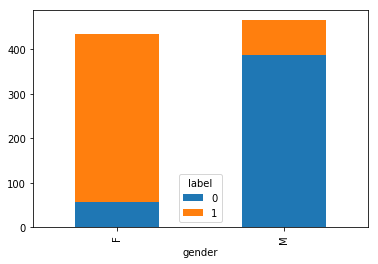

In [26]:
#cm = confusion_matrix(galton_height_gender_cols["gender"],label)
#cm = pd.Series(label)
#cm = cm.value_counts()

galton_height_gender_cols['label'] = label
cm_temp = pd.crosstab(galton_height_gender_cols['gender'], galton_height_gender_cols['label'])
print(cm_temp)
cm_temp.plot(kind='bar', stacked=True)
plt.show()

# code after this is redundant and plot the same thing again so thats why it is not coded here.

Clustering the World Bank data.  

In [27]:
world_bank_data.head()
k = 2
world_bank_2k_cluster = KMeans(n_clusters=k).fit(world_bank_data)
k2_mean = world_bank_2k_cluster.cluster_centers_
k2_label = world_bank_2k_cluster.labels_
k = 3
world_bank_3k_cluster = KMeans(n_clusters=k).fit(world_bank_data)
k3_mean = world_bank_3k_cluster.cluster_centers_
k3_label = world_bank_3k_cluster.labels_
np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
print("2k cluster: \n", k2_mean)
print("3k cluster: \n", k3_mean)

2k cluster: 
 [[   70.9231    25.0814  8161.6712    87.8985]
 [   80.6216     4.45   63777.9709    97.009 ]]
3k cluster: 
 [[   69.1127    29.8206  4615.0398    85.2681]
 [   80.6216     4.45   63777.9709    97.009 ]
 [   77.7622     7.1778 21560.0564    97.8355]]


Determining number of clusters. There is a number of methods for The issue of determining âthe right number of clustersâ including Hartiganâs rule, averaged Silhouette width and Gap statistic.

[8807652495, 2896254455.0, 852926402.0, 520612329.0, 283461815.0, 162244518.0, 79195673.0, 47035675.0, 36319814.0, 26302653.0]


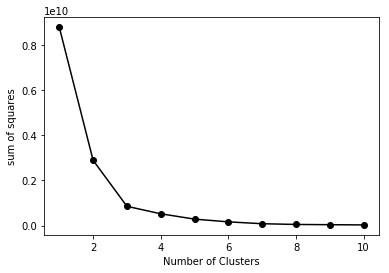

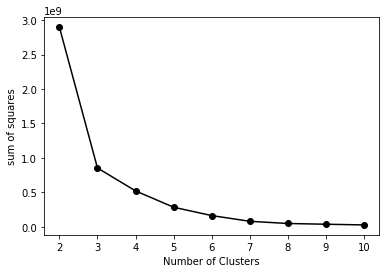

In [28]:
world_bank_data = world_bank_data.apply(pd.to_numeric)
sos=[]
sos.append(round((world_bank_data.shape[0]-1) * sum(world_bank_data.var())))

for i in range(2, 11):
    model = KMeans(n_clusters=i).fit(world_bank_data)
    sos.append(round(model.inertia_))
print(sos)

plt.plot(range(1, 11), sos, '-ok')
plt.xlabel("Number of Clusters")
plt.ylabel("sum of squares")
plt.show()

plt.plot(range(2, 11), sos[1:], '-ok')
plt.xlabel("Number of Clusters")
plt.ylabel("sum of squares")
plt.show()

#Note: FITKmeans algo is missing here since there is no package which implements the FITKmeans algo in the python


A k of 6?

In [29]:
world_bank_data.head()
k = 6
world_bank_6k_cluster = KMeans(n_clusters=k).fit(world_bank_data)
print("6k cluster labels: \n", world_bank_6k_cluster.labels_)
world_bank_6k_cluster_33 = KMeans(n_clusters=k, random_state= 33).fit(world_bank_data)
print("Total country: ", len(world_bank_country))
world_bank_country['label'] =world_bank_6k_cluster_33.labels_
print("6k cluster labels: \n", world_bank_6k_cluster_33.labels_)

cm_temp = pd.crosstab(world_bank_country['Country'], world_bank_country['label'])
print(cm_temp)


6k cluster labels: 
 [0 3 0 0 0 0 3 0 0 0 0 0 3 0 5 0 0 0 3 0 1 0 1 0 0 3 0 0 3 2 5 0 0 4 5 1 0
 0 5 3 0 0 5 0 0]
Total country:  45
6k cluster labels: 
 [1 4 1 1 1 1 4 1 1 1 1 1 4 1 3 1 1 1 4 1 0 1 0 1 1 4 1 1 4 2 3 1 1 5 3 0 1
 1 3 4 1 1 3 1 1]
label                   0  1  2  3  4  5
Country                                 
Angola                  0  1  0  0  0  0
Antigua and Barbuda     0  0  0  0  1  0
Azerbaijan              0  1  0  0  0  0
Bangladesh              0  1  0  0  0  0
Bosnia and Herzegovina  0  1  0  0  0  0
Botswana                0  1  0  0  0  0
Brazil                  0  0  0  0  1  0
Chad                    0  1  0  0  0  0
Dominican Republic      0  1  0  0  0  0
Ecuador                 0  1  0  0  0  0
Egypt, Arab Rep.        0  1  0  0  0  0
El Salvador             0  1  0  0  0  0
Equatorial Guinea       0  0  0  0  1  0
Georgia                 0  1  0  0  0  0
Greece                  0  0  0  1  0  0
Guatemala               0  1  0  0  0  0
Guinea-Bissau  

## Evaluating model performance 

In [30]:
clust_size = pd.Series(world_bank_6k_cluster.labels_).value_counts()
clust_size = pd.DataFrame(clust_size).reset_index(inplace=False)
clust_size.columns = ['Cluster', 'Count']
print(clust_size.head())

print("6k cluster center:\n",world_bank_6k_cluster.cluster_centers_)
print("columns:", world_bank_data.columns)

world_bank_data_aggregate = world_bank_data
world_bank_data_aggregate['label'] = world_bank_6k_cluster.labels_
pci = world_bank_data_aggregate[['Per.capita.income', 'label']].groupby('label').mean()
print(pci)
l = world_bank_data_aggregate[['Literacy', 'label']].groupby('label').mean()
print(l)
im = world_bank_data_aggregate[['Infant.mortality', 'label']].groupby('label').mean()
print(im)
ie = world_bank_data_aggregate[['Life.expectancy', 'label']].groupby('label').mean()
print(ie)

cm_3 = pd.crosstab(world_bank_data_aggregate['Per.capita.income'], world_bank_data_aggregate['label'])
print(cm_3)

   Cluster  Count
0        0     28
1        3      7
2        5      5
3        1      3
4        4      1
6k cluster center:
 [[   68.3133    32.0857  3369.9656    83.0296]
 [   80.1178     4.5667 28221.0918    97.5785]
 [   78.5968     6.8    74667.1971    97.4779]
 [   73.2855    17.3286 10954.4564    96.1769]
 [   82.6463     2.1    52888.7447    96.5401]
 [   76.7138     9.02   19049.6708    97.7668]]
columns: Index(['Life.expectancy', 'Infant.mortality', 'Per.capita.income', 'Literacy'], dtype='object')
       Per.capita.income
label                   
0            3369.965600
1           28221.091830
2           74667.197070
3           10954.456423
4           52888.744670
5           19049.670780
        Literacy
label           
0      83.029595
1      97.578487
2      97.477850
3      96.176869
4      96.540150
5      97.766846
       Infant.mortality
label                  
0             32.085714
1              4.566667
2              6.800000
3             17.328571
4   

[0 3 0 0 0 0 3 0 0 0 0 0 3 0 5 0 0 0 3 0 1 0 1 0 0 3 0 0 3 2 5 0 0 4 5 1 0
 0 5 3 0 0 5 0 0]


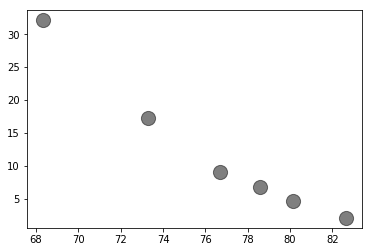

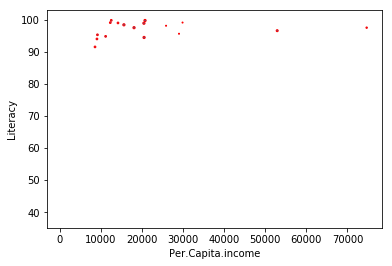

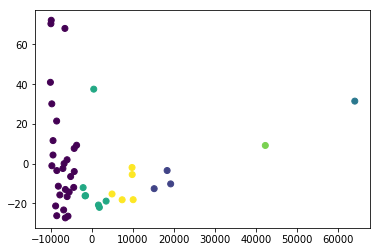

In [31]:
print(world_bank_6k_cluster.labels_)
#sns.pairplot(world_bank_data_aggregate)
centers = world_bank_6k_cluster.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

plt.scatter(world_bank_data_aggregate['Per.capita.income'], world_bank_data_aggregate['Literacy'], s=world_bank_6k_cluster.labels_, edgecolors='red')
plt.xlabel('Per.Capita.income')
plt.ylabel('Literacy')
plt.show()

pca_temp = PCA(2)
plot_colms = pca_temp.fit_transform(world_bank_data)
plt.scatter(x=plot_colms[:, 0], y=plot_colms[:, 1], c=world_bank_data['label'])
plt.show()

# K-medoids clustering in R

K-medoids clustering in R. PAM can handle catagerical data and is robust to outliers


In [33]:
k = 4
#world_bank_data.head()
world_bank_4k_cluster = kmedoids.kmedoids(world_bank_data, k)
# K-medoids clustering in R is available but it not available in python

NameError: name 'kmedoids' is not defined


## Gap statistic

Gap statistic

clusGap() calculates a goodness of clustering measure, the âgapâ statistic. For each number of clusters k, it compares $\log(W(k))$ with $E^*[\log(W(k))]$ where the latter is defined via bootstrapping, i.e. simulating from a reference distribution.  

maxSE(f, SE.f) determines the location of the maximum of f, taking a â1-SE ruleâ into account for the *SE* methods. The default method "firstSEmax" looks for the smallest k such that its value f(k) is not more than 1 standard error away from the first local maximum. This is similar but not the same as "Tibs2001SEmax", Tibshirani et al's recommendation of determining the number of clusters from the gap statistics and their standard deviations.  

See [clusGap](https://stat.ethz.ch/R-manual/R-devel/library/cluster/html/clusGap.html)   


In [15]:
# gap statistic is not available in the python with any package 

# Hierarchical clustering in R

Hierarchical clustering in R

Hierarchical Clustering for the wholesale customers data set.

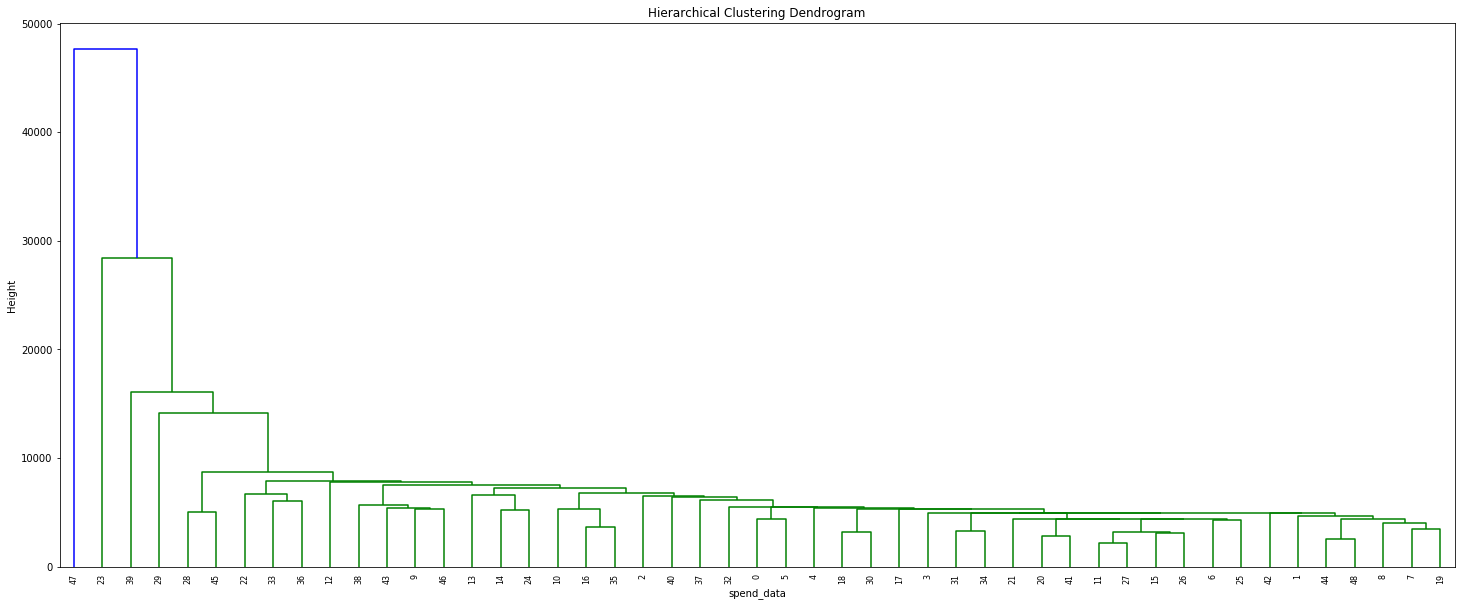

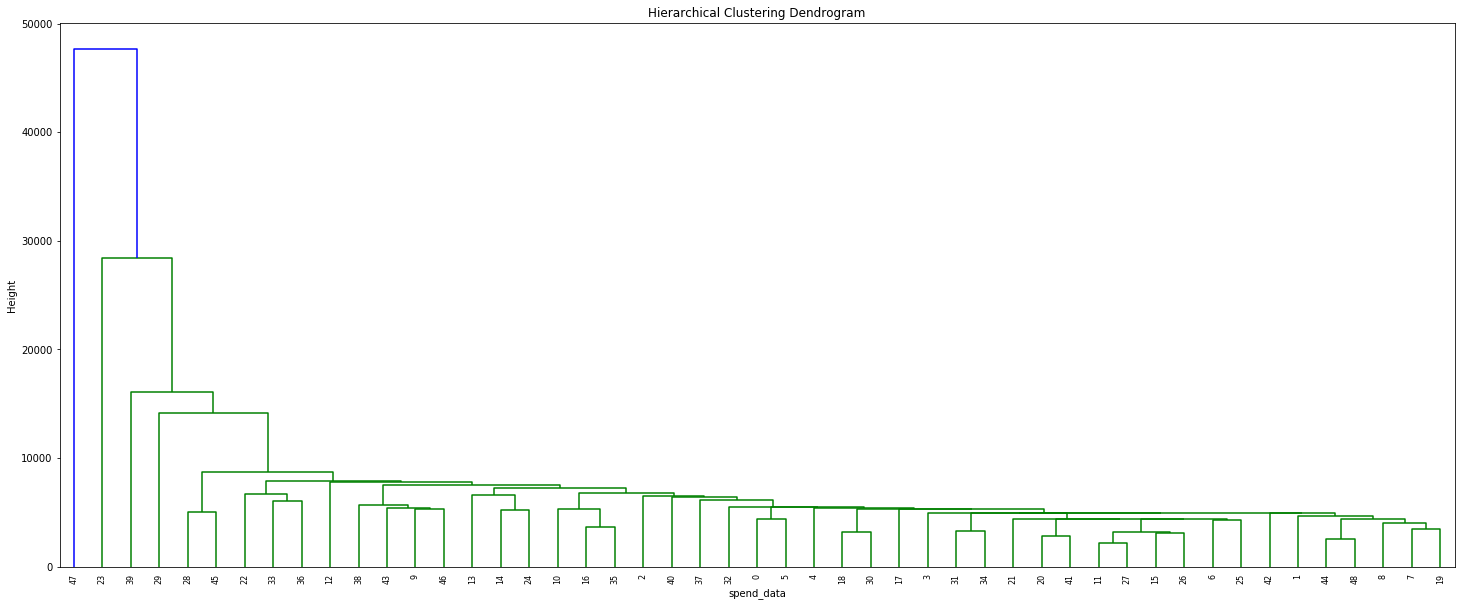

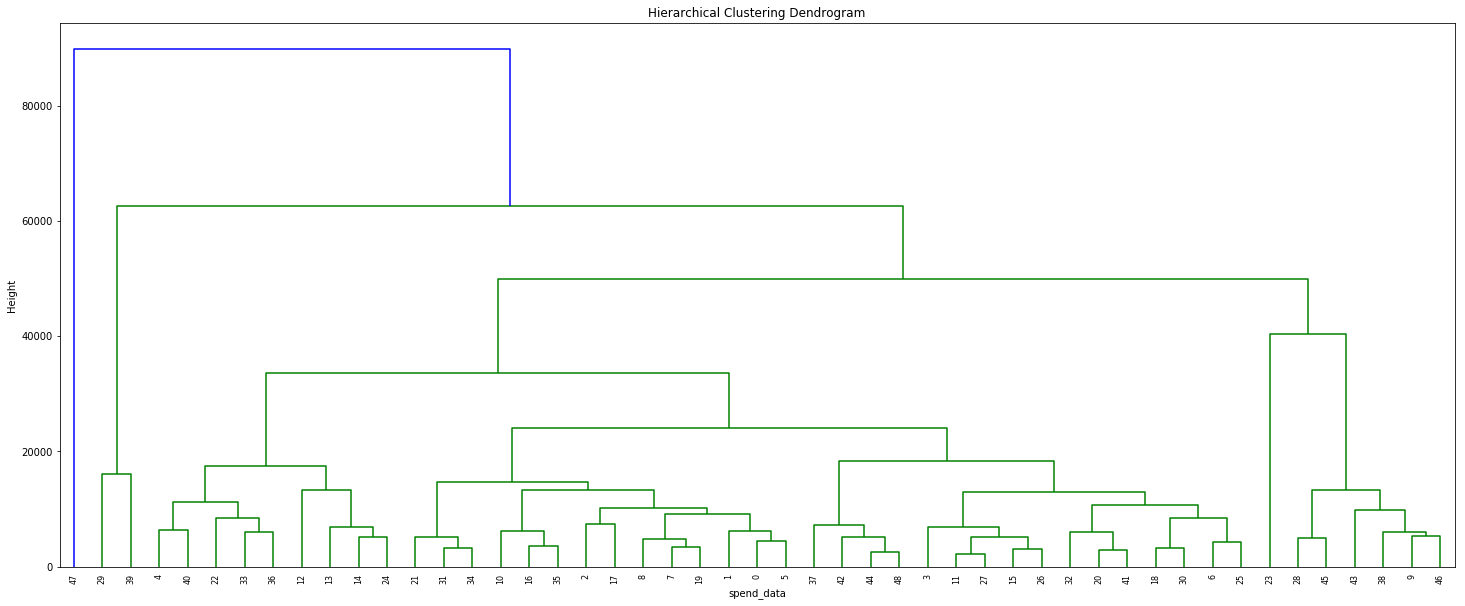

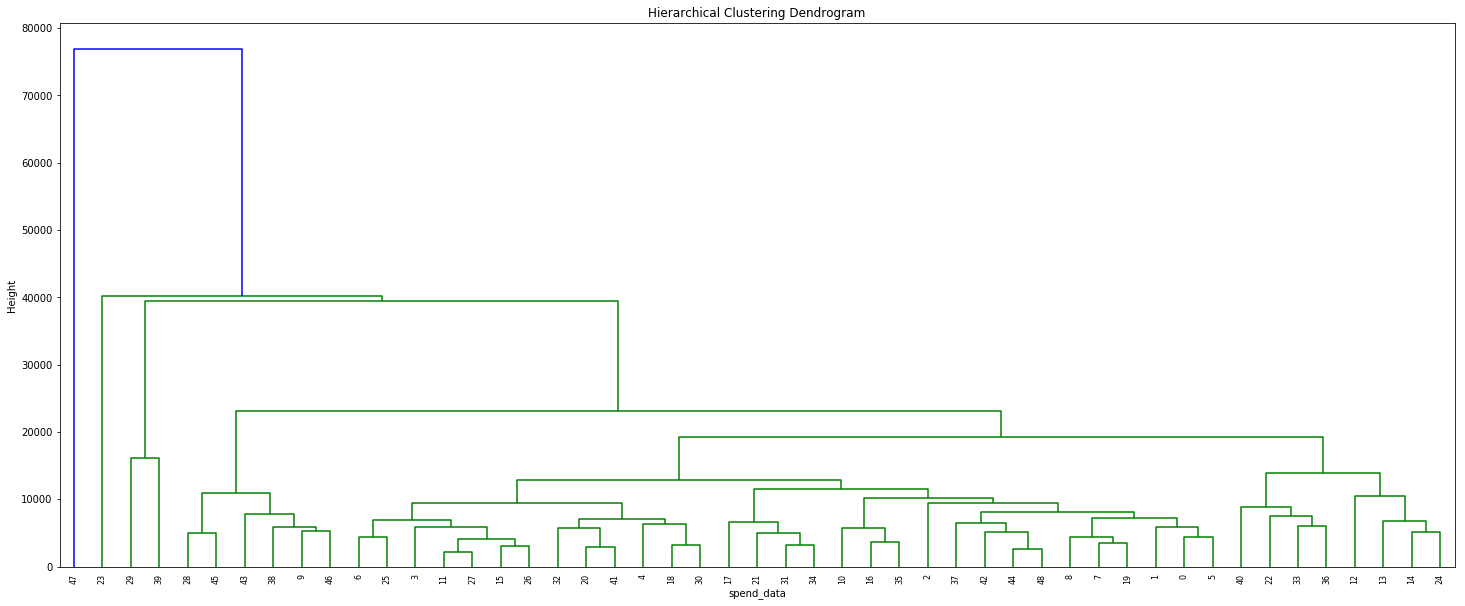

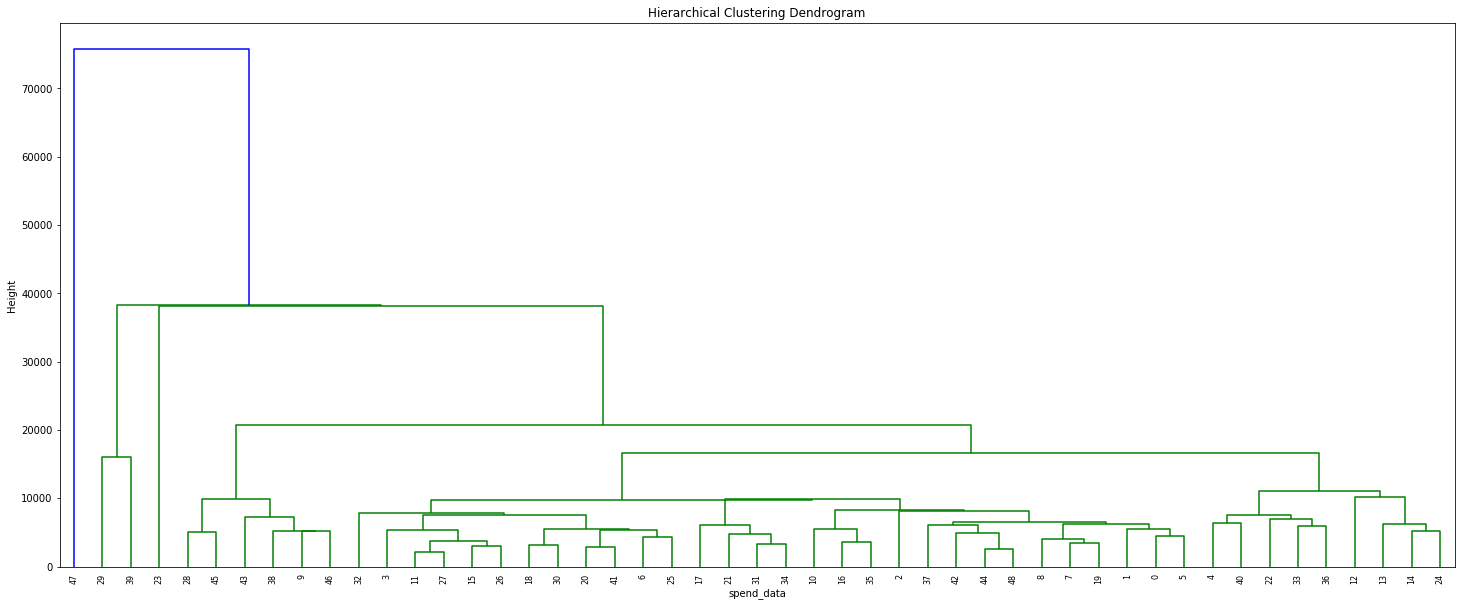

In [34]:
spend_data.head()
spend_h_cluster = linkage(spend_data)
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
dendrogram(spend_h_cluster, leaf_rotation=90., leaf_font_size=8.)
plt.show()

spend_h_cluster_si = linkage(spend_data,method='single')
spend_h_cluster_co = linkage(spend_data,method='complete')
spend_h_cluster_av = linkage(spend_data,method='average')
spend_h_cluster_ce = linkage(spend_data,method='centroid')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
dendrogram(spend_h_cluster_si, leaf_rotation=90., leaf_font_size=8.)
plt.show()

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
dendrogram(spend_h_cluster_co, leaf_rotation=90., leaf_font_size=8.)
plt.show()

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
dendrogram(spend_h_cluster_av, leaf_rotation=90., leaf_font_size=8.)
plt.show()

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
dendrogram(spend_h_cluster_ce, leaf_rotation=90., leaf_font_size=8.)
plt.show()

Plotting to deterimine the cluster level.

In [17]:
#shows rectangle for each cluster in the dedrogram which is not possible in python

Hierarchical clustering using centroid clustering and squared Euclidean distance


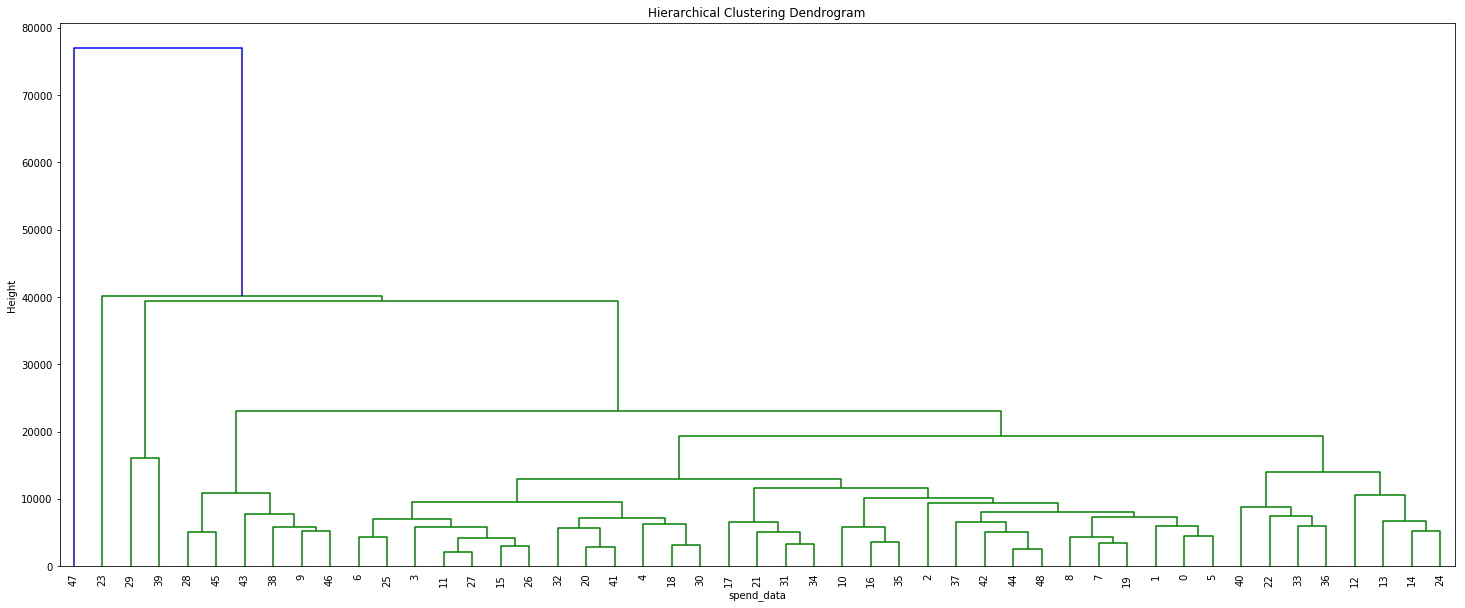

   Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  \
0       1  12669  9656     7561     214              2674        1338   
1       2   7057  9810     9568    1762              3293        1776   
2       3   6353  8808     7684    2405              3516        7844   
3       4  13265  1196     4221    6404               507        1788   
4       5  22615  5410     7198    3915              1777        5185   

   cut_tree  
0         0  
1         1  
2         1  
3         0  
4         2  
                 Fresh          Milk       Grocery        Frozen  \
cut_tree                                                           
0         13096.400000   3195.600000   5265.000000   1800.600000   
1          6242.117647   5075.647059   7176.764706   1433.588235   
2         22757.333333   3686.666667   4947.000000   4563.666667   
3         20396.000000   9849.000000  14853.000000   1864.000000   
4         24653.000000   9465.000000  12091.000000    294.000000   
7

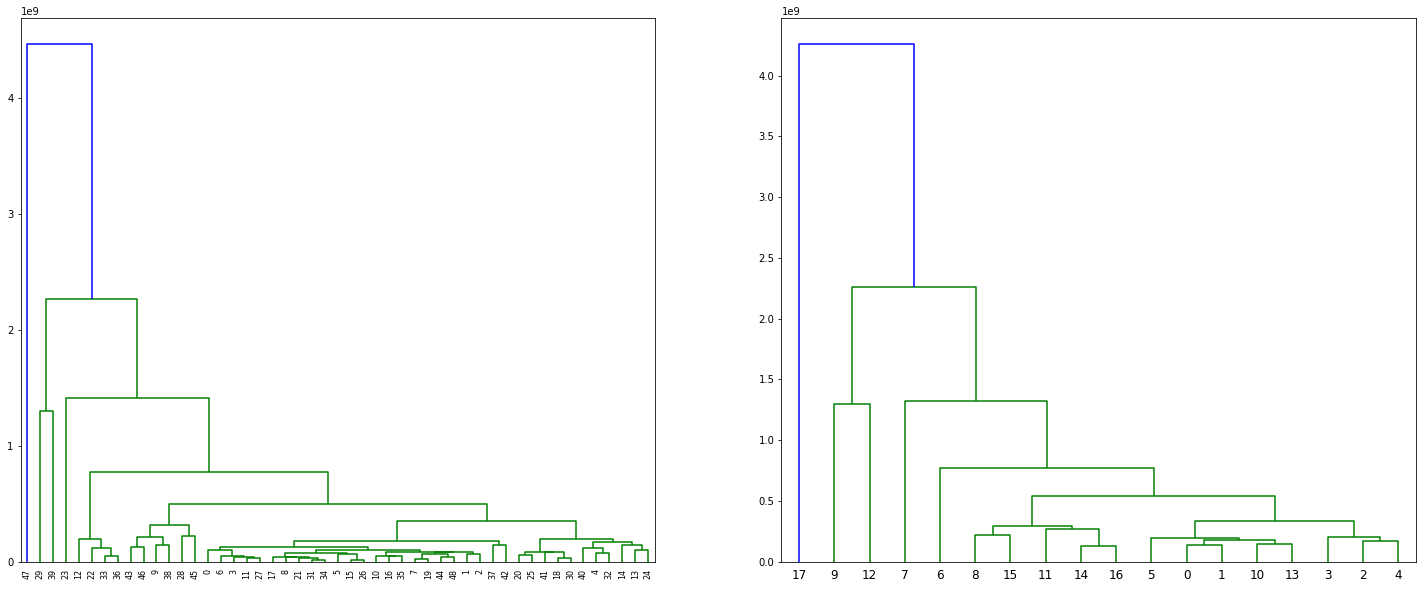

In [18]:
h_c = linkage(spend_data,method="average")
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
dendrogram(h_c, leaf_rotation=90., leaf_font_size=10.)
plt.show()

h_c = linkage(spend_data**2, method="centroid")
plt.figure(figsize=(25, 10))
memb = cut_tree(h_c, n_clusters=20)
memb_temp = [i[0] for i in memb]
spend_data['cut_tree'] = pd.Series(memb_temp)
print(spend_data.head())

sample_data = spend_data.iloc[:, 1:].groupby('cut_tree').mean()
print(sample_data.head(100))

h_c1 = linkage(sample_data**2, method="centroid")
plt.subplot(1, 2, 1)
dendrogram(h_c)
plt.subplot(1, 2, 2)
dendrogram(h_c1)
plt.show()



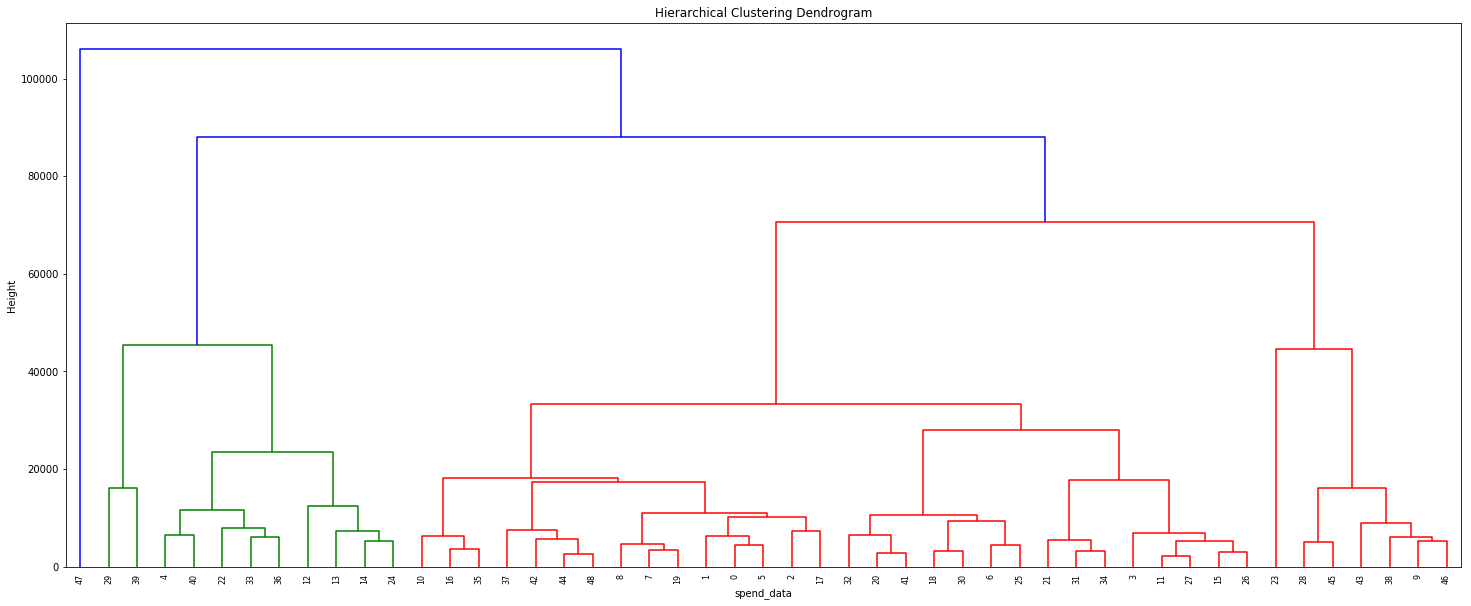

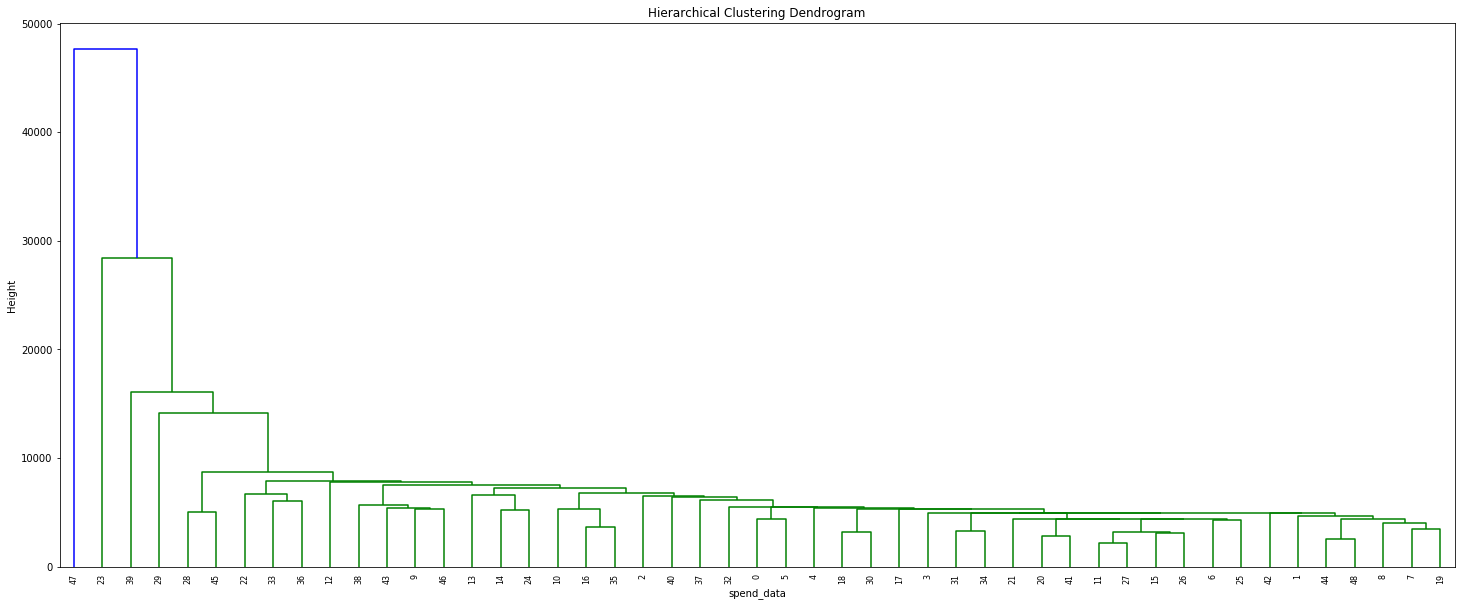

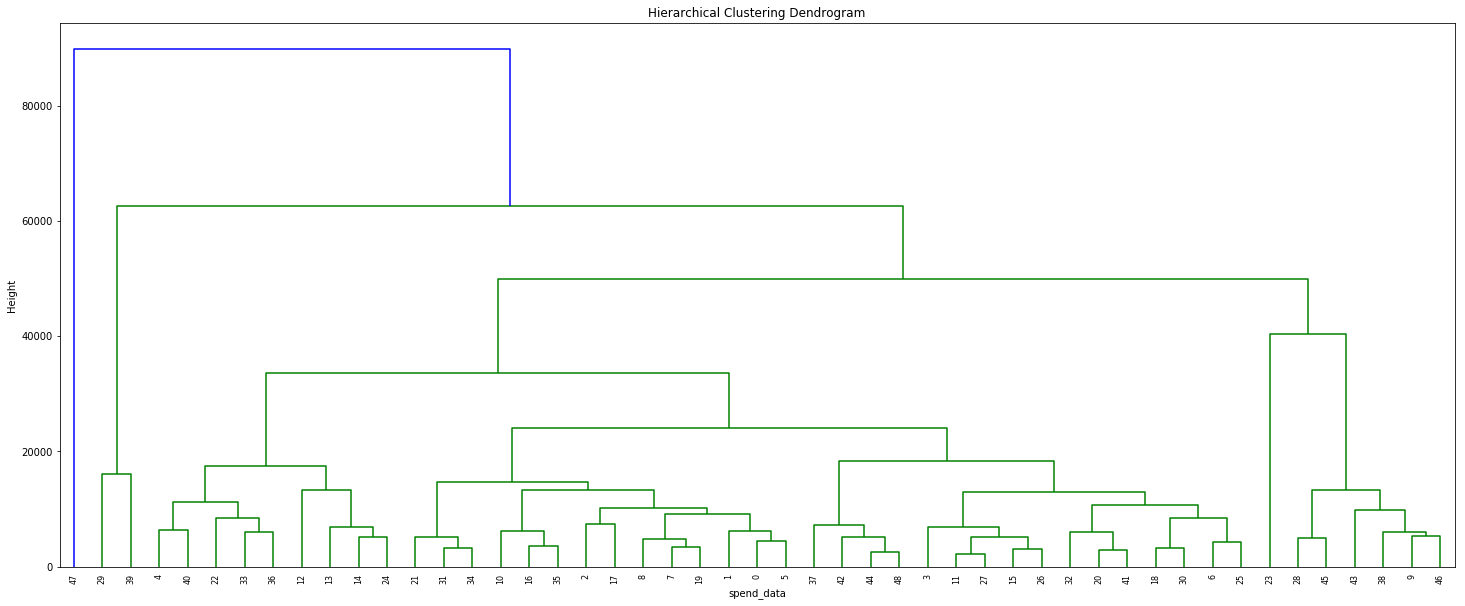

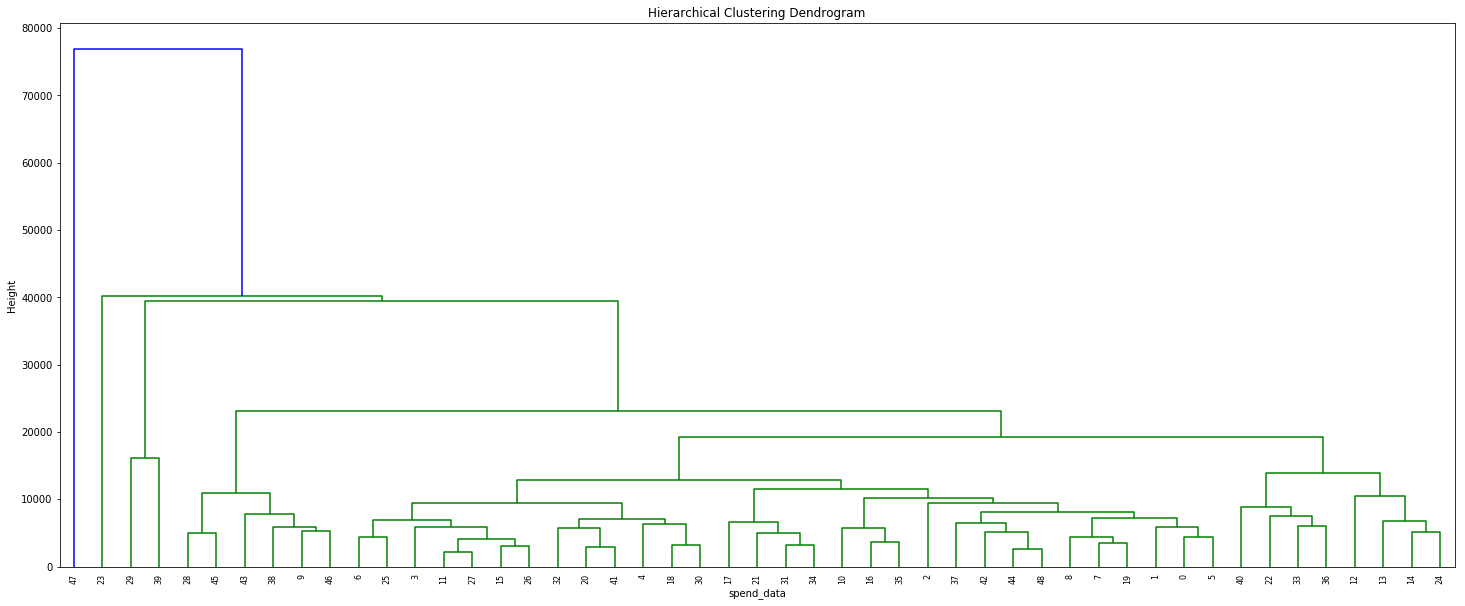

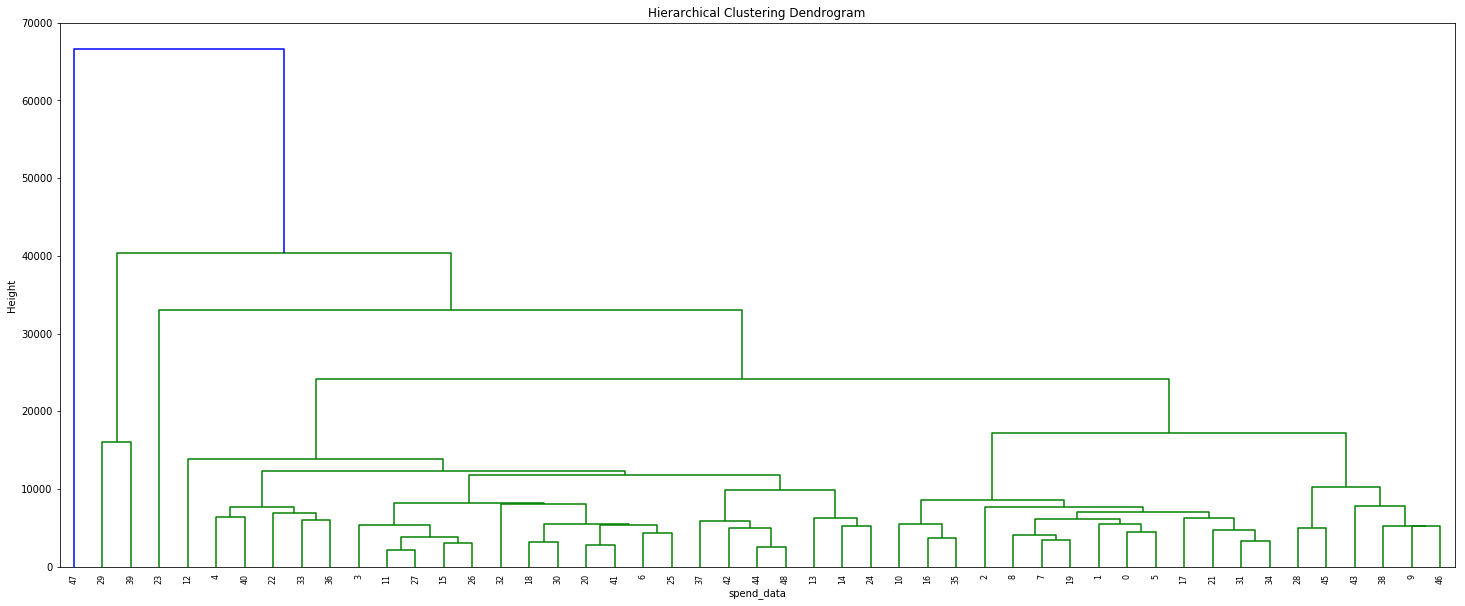

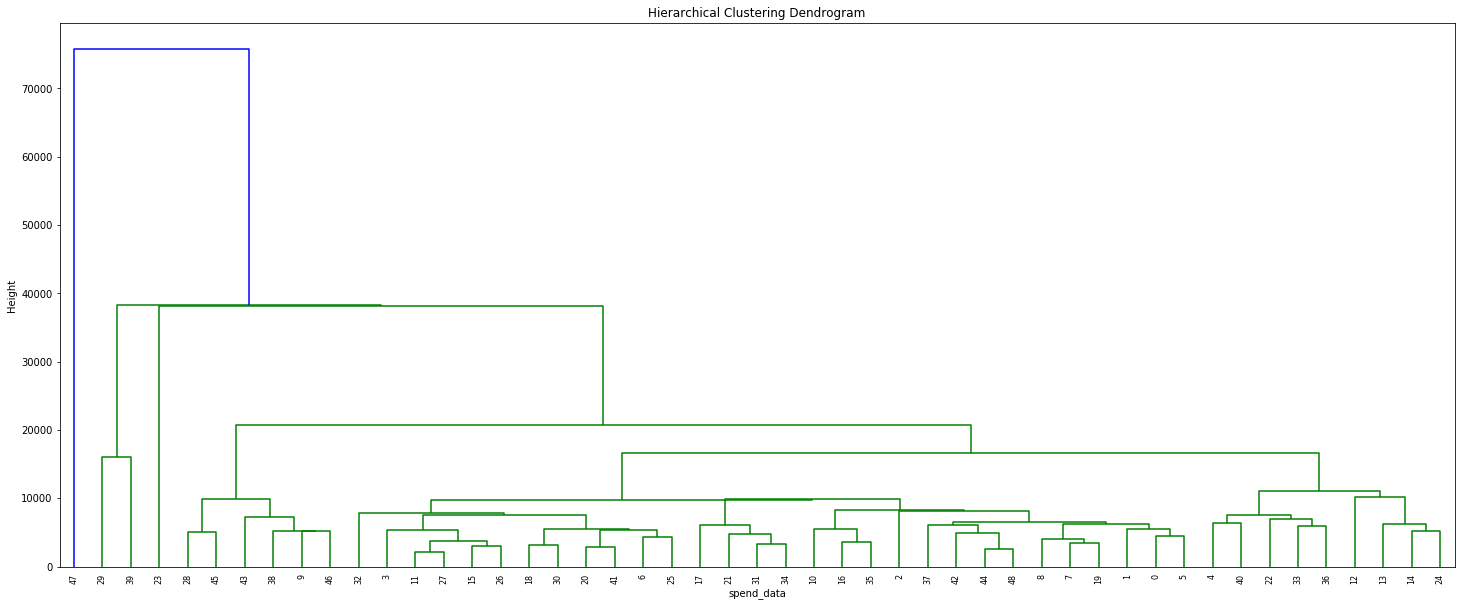

In [19]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
h_c10 = linkage(spend_data,method='ward',metric='euclidean')
dendrogram(h_c10)
plt.show()

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
h_c2 = linkage(spend_data,method='single',metric='euclidean')
dendrogram(h_c2)
plt.show()

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
h_c3 = linkage(spend_data,method='complete',metric='euclidean')
dendrogram(h_c3)
plt.show()

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
h_c4 = linkage(spend_data,method='average',metric='euclidean')
dendrogram(h_c4)
plt.show()

# below method is not exist in the python which is available in R
#h_c5 = linkage(spend_data,method='mcquitty',metric='euclidean')
#dendrogram(h_c5)
#plt.show()

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
h_c6 = linkage(spend_data,method='median',metric='euclidean')
dendrogram(h_c6)
plt.show()

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
h_c7 = linkage(spend_data,method='centroid',metric='euclidean')
dendrogram(h_c7)
plt.show()

# Readings  
  
An Introduction to Statistical Learning with Applications in R (2013)
Authors: Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani
Free online via SpringerLink (http://link.Springer.com/) http://link.springer.com/book/10.1007/978-1-4614-7138-7

* Chapter 14 Unsupervised Learning   
* Chapter 13 Prototype Methods and Nearest-Neighbors   
# Resources  

[UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/)

[K-means clustering is not a free lunch](http://varianceexplained.org/r/kmeans-free-lunch/)